# **Stock Market EDA and Feature Generation**

In [26]:
#Import Required Packages

import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
from os.path import exists as file_exists
import ta as ta
import matplotlib.pyplot as plt

In [27]:
#Define our Simple Moving Average, Window Moving Average, and Hull Moving Average functions
def SMA(data, n):
    sma = data.rolling(window = n).mean()
    return pd.DataFrame(sma)
    
def WMA(s, period):
    return data['Close'].rolling(period).apply(lambda x: ((np.arange(period)+1)*x).sum()/(np.arange(period)+1).sum(), raw=True)

def HMA(s, period):
    return WMA(WMA(data['Close'], period//2).multiply(2).sub(WMA(s, period)), int(np.sqrt(period)))

In [28]:
#Import Data
ticker = 'TQQQ'
yfticker = yf.Ticker(ticker)
stock_file_name = 'S:/Trading/StockData/{ticker}.csv'.format(ticker = ticker)
n = [10,20,30,60,120,180,270,360]
hist = yfticker.history(period="max")
hist['Ticker'] = 'TQQQ'
hist.head(10)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2010-02-11 00:00:00-05:00,0.405858,0.433809,0.404560,0.431471,3456000,0.0,0.0,TQQQ
2010-02-12 00:00:00-05:00,0.419730,0.436978,0.417288,0.433238,8601600,0.0,0.0,TQQQ
2010-02-16 00:00:00-05:00,0.443420,0.451058,0.436459,0.450019,9619200,0.0,0.0,TQQQ
2010-02-17 00:00:00-05:00,0.456046,0.457759,0.449188,0.457656,19180800,0.0,0.0,TQQQ
2010-02-18 00:00:00-05:00,0.457188,0.469085,0.454435,0.466332,38860800,0.0,0.0,TQQQ
2010-02-19 00:00:00-05:00,0.463163,0.472411,0.459630,0.466332,46483200,0.0,0.0,TQQQ
2010-02-22 00:00:00-05:00,0.471839,0.471839,0.457811,0.463059,25497600,0.0,0.0,TQQQ
2010-02-23 00:00:00-05:00,0.460513,0.463007,0.438849,0.444979,41126400,0.0,0.0,TQQQ
2010-02-24 00:00:00-05:00,0.452824,0.463682,0.450382,0.458435,35308800,0.0,0.0,TQQQ


In [29]:
#Clean up the Date column, reset index, and add features from TA lib

data = hist.reset_index()
data['Date'] = data['Date'].apply(lambda x: x.date())
data = data[data.columns[[0,8,1,2,3,4,5,6,7]]]
data = ta.add_all_ta_features(data, "Open", "High", "Low", "Close", "Volume", fillna=True)

#Calc SMA values and append to dataframe
for i in n:
    data[f'SMA_{i}'] = SMA(data['Close'], i)
    data[f'WMA_{i}'] = WMA(data['Close'], i)
    data[f'HMA_{i}'] = HMA(data['Close'], i)

data.head(10)

C:\Users\blayn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\blayn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
C:\Users\blayn\AppData\Local\Temp/ipykernel_18128/1915253849.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'HMA_{i}'] = HMA(data['Close'], i)
C:\Users\blayn\AppData\Local\Temp/ipykernel_18128/1915253849.py:10: PerformanceWarning: DataFra

,Date,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,volume_adi,...,HMA_120,SMA_180,WMA_180,HMA_180,SMA_270,WMA_270,HMA_270,SMA_360,WMA_360,HMA_360
0,2010-02-11,TQQQ,0.405858,0.433809,0.404560,0.431471,3456000,0.0,0.0,2.903478e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-12,TQQQ,0.419730,0.436978,0.417288,0.433238,8601600,0.0,0.0,8.236998e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-02-16,TQQQ,0.443420,0.451058,0.436459,0.450019,9619200,0.0,0.0,1.648656e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-02-17,TQQQ,0.456046,0.457759,0.449188,0.457656,19180800,0.0,0.0,3.520316e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-02-18,TQQQ,0.457188,0.469085,0.454435,0.466332,38860800,0.0,0.0,5.945846e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-02-19,TQQQ,0.463163,0.472411,0.459630,0.466332,46483200,0.0,0.0,6.172578e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-02-22,TQQQ,0.471839,0.471839,0.457811,0.463059,25497600,0.0,0.0,5.530562e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-02-23,TQQQ,0.460513,0.463007,0.438849,0.444979,41126400,0.0,0.0,3.505236e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2010-02-24,TQQQ,0.452824,0.463682,0.450382,0.458435,35308800,0.0,0.0,4.249870e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-02-25,TQQQ,0.443784,0.461292,0.434901,0.458175,45619200,0.0,0.0,7.734154e+07,...,0.456676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now let's calculate a trading signal and a quick backtest

In [30]:
#Input parameters
investment_value = 100000
strategy = 'Mean Reversion'
short_window = 'SMA_10'
long_window = 'SMA_60'
start_date = '1/1/2018'
end_date = '11/2/2022'


#Calculate trade signals using our SMA mean reversion strategy
data[short_window+long_window+'_signal'] = 0
data[short_window+long_window+'_signal'] = np.where(data[short_window] > data[long_window], 1, 0)
data[short_window+long_window+'_position'] = data[short_window+long_window+'_signal'].diff()


#Set the Index to date and grab time periods we want
data['Date'] = pd.to_datetime(data['Date'])
data = data[(data['Date'] >= start_date) & (data['Date'] < end_date)]
data = data.set_index('Date')

data.head()

C:\Users\blayn\AppData\Local\Temp/ipykernel_18128/1033918430.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[short_window+long_window+'_signal'] = 0
C:\Users\blayn\AppData\Local\Temp/ipykernel_18128/1033918430.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[short_window+long_window+'_position'] = data[short_window+long_window+'_signal'].diff()


,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,volume_adi,volume_obv,...,WMA_180,HMA_180,SMA_270,WMA_270,HMA_270,SMA_360,WMA_360,HMA_360,SMA_10SMA_60_signal,SMA_10SMA_60_position
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,TQQQ,11.717428,12.153193,11.633436,12.128244,45867600,0.0,0.0,1.422354e+10,3494583600,...,10.197304,11.850322,8.508172,9.531134,11.831029,7.664522,8.871758,11.805764,1,0.0
2018-01-03,TQQQ,12.177311,12.529083,12.175647,12.483344,42612000,0.0,0.0,1.425512e+10,3537195600,...,10.229774,11.942019,8.535732,9.560472,11.915517,7.685567,8.898456,11.889431,1,0.0
2018-01-04,TQQQ,12.629708,12.674615,12.512450,12.556526,35012400,0.0,0.0,1.423914e+10,3572208000,...,10.262724,12.033907,8.562871,9.590145,11.999743,7.706603,8.925441,11.972247,1,0.0
2018-01-05,TQQQ,12.731996,12.963185,12.666299,12.935741,41190000,0.0,0.0,1.427272e+10,3613398000,...,10.299534,12.168720,8.591295,9.622417,12.121073,7.729003,8.954412,12.086635,1,0.0
2018-01-08,TQQQ,12.934078,13.106222,12.921604,13.079611,36126000,0.0,0.0,1.429843e+10,3649524000,...,10.337591,12.312790,8.619796,9.655542,12.248713,7.751675,8.984055,12.206466,1,0.0


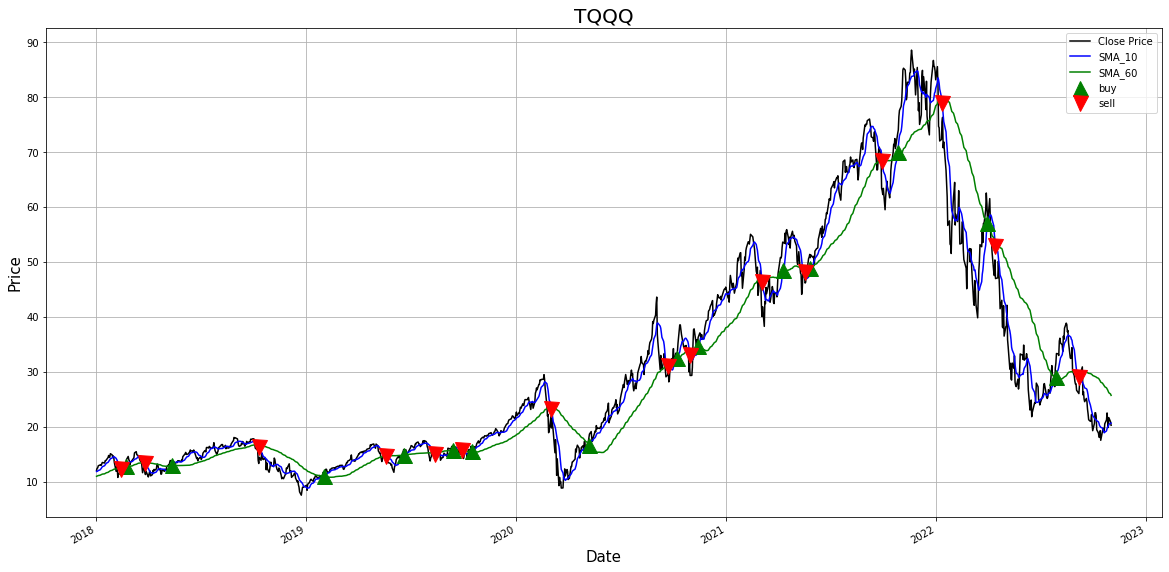

In [31]:
#Plotting data
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data['Close'].plot(color = 'k', label= 'Close Price') 
data[short_window].plot(color = 'b',label = short_window) 
data[long_window].plot(color = 'g', label = long_window)

# plot 'buy' signals
plt.plot(data[data[short_window+long_window+'_position'] == 1].index, 
        data[short_window][data[short_window+long_window+'_position'] == 1], 
        '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(data[data[short_window+long_window+'_position'] == -1].index, 
        data[short_window][data[short_window+long_window+'_position'] == -1], 
        'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15)
plt.xlabel('Date', fontsize = 15 )
plt.title(ticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()


In [34]:
#Trades Stats
trades = data.loc[(data[short_window+long_window+'_position'] == 1) | (data[short_window+long_window+'_position'] == -1)]
trades = trades[['Close',short_window+long_window+'_position']]
trades = trades.reset_index()
trades['buy_price'] = trades['Close'].shift(1)
trades = trades.loc[trades[short_window+long_window+'_position'] == -1]
trades['return'] = (trades['Close']/trades['buy_price']) - 1
trades['win_lose'] = trades['return'].apply(lambda x: 1 if x>0 else 0)

#Performance Metrics
pct_return = round((trades['return'].sum()),2)
investment_return = investment_value * pct_return
win_loss_ratio = round(trades['win_lose'].mean(),3)


backtest = pd.DataFrame()
backtest.loc[0,'ticker'] = ticker
backtest.loc[0,'strategy'] = short_window+long_window
backtest.loc[0, "return"] = pct_return
backtest.loc[0,'win_loss_ratio'] = win_loss_ratio
backtest.loc[0,'investment_return'] = investment_return

summary = "Our {} strategy with {} and {} variables and an investment of {} returned {}%, and a Win/Loss Ratio of {}% between {} and {}, for a total return of ${}".format(strategy,short_window,long_window,investment_value,pct_return*100,win_loss_ratio*100,start_date,end_date,investment_return)

print(summary)

Our Mean Reversion strategy with SMA_10 and SMA_60 variables and an investment of 100000 returned 61.0%, and a Win/Loss Ratio of 40.0% between 1/1/2018 and 11/2/2022, for a total return of $61000.0
